In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import sys
import argparse
import overpass


%matplotlib inline 

In [29]:
import json
json1_file = open('testFeatureMapping.json')
json1_str = json1_file.read()
mapping = json.loads(json1_str)

In [3]:
# Replace with inline add
observations = gpd.read_file('../data/SidewalkObservations/SidewalkObservations.shp')

In [4]:
testObs = observations.head(50)
testObs

,OBJECTID,SIDEWALK_U,OBSERV_TYP,OBSTRUCTIO,CLEARANCE_,TREE_UNITI,MINIMUM_WI,LEVEL_DIFF,UTILITY_OW,ISOLATED_C,FAILING_SH,SURFACE_CO,OTHER_FEAT,HEIGHT_DIF,GlobalID,geometry
0,1,SDW-44610,SURFCOND,,,,,,,,,CRACK>72,,,d01c130e-e5ff-4105-9e70-cd304fc1991d,POINT (-122.333868062383 47.55421346976489)
1,2,SDW-44610,HEIGHTDIFF,,,TRE-1067558,,UPLIFT,,,,,,0.61,4dd58259-caab-4c0a-9e38-24463d6b2bed,POINT (-122.3335182104243 47.5542197502451)
2,3,SDW-44610,HEIGHTDIFF,,,TRE-1067558,,UPLIFT,,,,,,1.33,5ca774c2-b8d7-4117-8823-fc4390800370,POINT (-122.3334340700717 47.55422600738782)
3,4,SDW-44610,HEIGHTDIFF,,,,,UPLIFT,,,,,,0.73,e0b5e922-07d7-4f04-91e1-e0989a35cc71,POINT (-122.3333873843994 47.55423323384112)
4,5,SDW-44610,HEIGHTDIFF,,,,,SETTLING,,,,,,1.7,6cf3980f-a5f1-487a-bb28-06de9b686f14,POINT (-122.3332620358998 47.55423716133004)
5,6,SDW-44610,HEIGHTDIFF,,,,,SETTLING,,,,,,1.67,204c556e-bfc0-4208-887a-31d8bcd1153c,POINT (-122.3331850213272 47.55421924623123)
6,7,SDW-44610,HEIGHTDIFF,,,,,UPLIFT,,,,,,1.58,4442d60f-bd98-441c-bd90-a336504af00c,POINT (-122.3328786415772 47.55421570762238)
7,8,SDW-44610,SURFCOND,,,,,,,,,CRACK>72,,,cd3f7a2e-3567-4e2f-845c-4a87c03a51d9,POINT (-122.3327845618073 47.55421829636418)
8,9,SDW-44610,HEIGHTDIFF,,,TRE-1067604,,UPLIFT,,,,,,0.73,3fcd909b-42d7-49de-ad8d-2eddcbe6ad8f,POINT (-122.3327406344837 47.55421456941395)
9,10,SDW-44610,HEIGHTDIFF,,,TRE-1067568,,UPLIFT,,,,,,1.1,a8eed6cb-1eeb-4219-8c74-256b4f150211,POINT (-122.3326809669988 47.55421427607193)


In [39]:
# Create a bounding box around the data

bounds = testObs.total_bounds
bounds

array([-122.33386806,   47.55404841, -122.32478686,   47.55423716])

In [6]:
# Create an overpass reference and get OSM 
# map_query(e , n, s, w)
# bounds -> minx, miny, maxx, maxy

api = overpass.API()
map_query = overpass.MapQuery(bounds[1], bounds[0], bounds[3], bounds[2])
response = api.Get(map_query)

In [17]:
OSM = gpd.GeoDataFrame.from_features(response)

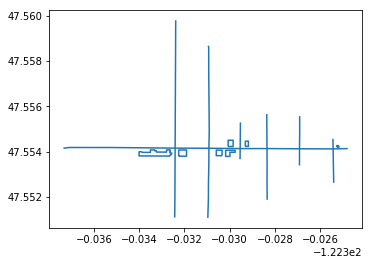

In [8]:
lines = OSM[OSM.geometry.type == 'LineString']
lines.plot()

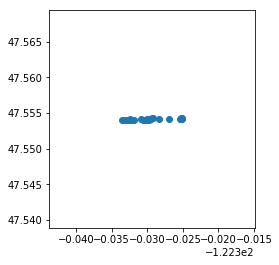

In [9]:
points = OSM[OSM.geometry.type == 'Point']
points.plot()

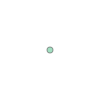

In [10]:
point = testObs.loc[0].geometry
point

In [11]:
mylist = [x.object for x in lines.sindex.nearest(point.bounds, 10, objects=True)]

distances = lines.loc[mylist].distance(point)

In [12]:
nearestIndex = distances.idxmin()

In [13]:
nearestSidewalk = lines.loc[nearestIndex]



In [14]:
pointList = [x.object for x in points.sindex.nearest(point.bounds, 10, objects=True)]
pointList

[22, 20, 23, 21, 2, 19, 18, 0, 17, 16]

In [15]:
points.loc[pointList].distance(point).min()

0.00038940921848649594

In [19]:
sidewalk = lines.loc[lines[distances == distances.min()].index[0]]

/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
col = mapping["col"]
type(col)

for item in col:
    print(item["name"])  

In [18]:
OSM

,addr:city,addr:housenumber,addr:postcode,addr:street,building,geometry,highway,lanes,name,old_ref,source,tiger:cfcc,tiger:county,tiger:name_base,tiger:name_direction_prefix,tiger:name_direction_suffix,tiger:name_type
0,NaN,NaN,NaN,NaN,NaN,POINT (-122.3309183 47.5541492),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,POINT (-122.3254314 47.5541215),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,POINT (-122.3324104 47.5541556),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,POINT (-122.3295375 47.5541352),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,POINT (-122.3283522 47.5541358),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,POINT (-122.3269162 47.5541266),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,POINT (-122.325265 47.5541994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,POINT (-122.3251705 47.5542015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,POINT (-122.3298475 47.554227),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,POINT (-122.3300685 47.5542275),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
if 'categoryMap' in mapping["HEIGHT_DIFF"]:
    print("yes")
else:
    print("no")


no


In [ ]:
gpd.GeoDataFrame(pd.concat([lines, 
                            gpd.GeoDataFrame({'geometry': [sidewalk_point]})
                            
                            
                            ))])